In [ ]:
import pandas as pd 
import numpy as np

: 

In [28]:
df = pd.read_excel("amazonLabelled.xlsx")
df = df[['Feedback','Sentiment']]
df.head()

,Feedback,Sentiment
0,"Good case, Excellent value.",Positive
1,Great for the jawbone.,Positive
2,Tied to charger for conversations lasting more...,Negative
3,The mic is great.,Positive
4,I have to jiggle the plug to get it to line up...,Negative


In [29]:
df.isnull().sum()

Feedback     0
Sentiment    0
dtype: int64

In [30]:
df.shape

(999, 2)

In [31]:
df.describe()

,Feedback,Sentiment
count,999,999
unique,989,2
top,Great phone!.,Positive
freq,2,500


In [32]:
df['Sentiment'].value_counts()

Positive    500
Negative    499
Name: Sentiment, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Sentiment'] = lb.fit_transform(df['Sentiment'])
df.head()

,Feedback,Sentiment
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


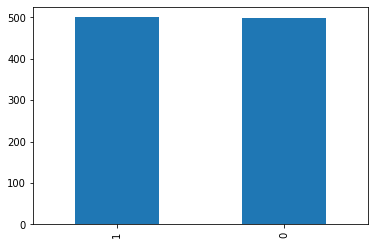

In [34]:
#visualize with bar graph
df['Sentiment'].value_counts().plot.bar()

([<matplotlib.patches.Wedge at 0x7f5e3a3efed0>,
 [Text(-0.0017296038214188957, 1.0999986402130781, 'Positive'),
  Text(0.0017296038214187613, -1.0999986402130781, 'Negative')])

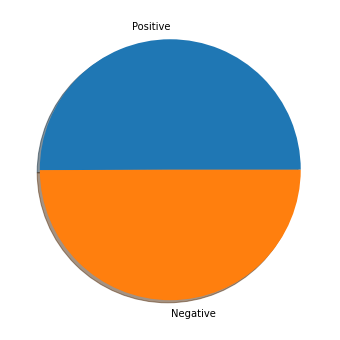

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.pie(df['Sentiment'].value_counts(),labels=['Positive','Negative'], shadow=True)

In [36]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet = WordNetLemmatizer()
Feedback = []
x=df['Feedback']
for i in range (len(x)):
    feedback = re.sub("[^a-zA-Z]"," ",x[i])
    feedback = feedback.lower()
    feedback = feedback.split()
    feedback = [wordnet.lemmatize(word) for word in feedback if word not in set(stopwords.words("english"))]
    feedback = " ".join(feedback)
    Feedback.append(feedback)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [37]:
dt=pd.DataFrame(Feedback,columns=['feedback'])
del df["Feedback"]
new_df=dt.join(df, how='outer')
new_df

,feedback,Sentiment
0,good case excellent value,1
1,great jawbone,1
2,tied charger conversation lasting minute major...,0
3,mic great,1
4,jiggle plug get line right get decent volume,0
...,...,...
994,screen get smudged easily touch ear face,0
995,piece junk lose call phone,0
996,item match picture,0
997,thing disappoint infra red port irda,0


CountVectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)

In [39]:
x = cv.fit_transform(new_df['feedback']).toarray()

In [40]:
x.shape

(999, 1551)

In [41]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,new_df['Sentiment'],test_size = 0.2,random_state = 42)

Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(n_estimators =100,criterion='gini', max_depth=20,min_samples_leaf=1,min_samples_split=5,max_features='log2',random_state=6)
model_RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=5,
                       random_state=6)

In [58]:
acc_Randomforest=model_RFC.score(x_test,y_test)
acc_Randomforest

0.72

In [44]:
y_pred1= model_RFC.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[77, 12],
       [44, 67]])

In [46]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred1)

'              precision    recall  f1-score   support\n\n           0       0.64      0.87      0.73        89\n           1       0.85      0.60      0.71       111\n\n    accuracy                           0.72       200\n   macro avg       0.74      0.73      0.72       200\nweighted avg       0.75      0.72      0.72       200\n'

Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
model_LR= LogisticRegression(random_state=6,solver='lbfgs')
model_LR.fit(x_train,y_train)


LogisticRegression(random_state=6)

In [57]:
acc_log=model_LR.score(x_test,y_test)
acc_log

0.765

In [49]:
y_pred2= model_RFC.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred2)

array([[77, 12],
       [44, 67]])

In [51]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred2)

'              precision    recall  f1-score   support\n\n           0       0.64      0.87      0.73        89\n           1       0.85      0.60      0.71       111\n\n    accuracy                           0.72       200\n   macro avg       0.74      0.73      0.72       200\nweighted avg       0.75      0.72      0.72       200\n'

Multinomial Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(x_train,y_train)

MultinomialNB()

In [60]:
acc_naive=model1.score(x_test,y_test)
acc_naive

0.79

In [54]:
y_pred3= model1.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred3)

array([[66, 23],
       [19, 92]])

In [56]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred3)

'              precision    recall  f1-score   support\n\n           0       0.78      0.74      0.76        89\n           1       0.80      0.83      0.81       111\n\n    accuracy                           0.79       200\n   macro avg       0.79      0.79      0.79       200\nweighted avg       0.79      0.79      0.79       200\n'

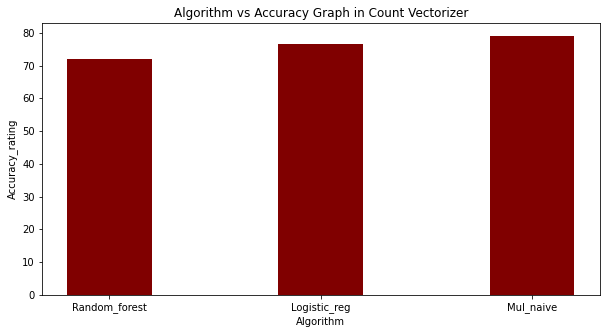

In [62]:
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Random_forest':acc_Randomforest*100, 'Logistic_reg':acc_log*100, 'Mul_naive':acc_naive*100}
Algorithm = list(data.keys())
Accuracy = list(data.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(Algorithm, Accuracy, color ='maroon',
        width = 0.4)
 
plt.xlabel("Algorithm")
plt.ylabel("Accuracy_rating")
plt.title("Algorithm vs Accuracy Graph in Count Vectorizer")
plt.show()